In [1]:
from persona2vec.model import Persona2Vec
from persona2vec.utils import read_graph
import numpy as np

In [2]:
G = read_graph('graph/karate.elist')

In [3]:
model = Persona2Vec(G, lambd=0.1)

2019-11-08 11:30:43,093 Gerating Walk iteration:
100%|██████████| 10/10 [00:00<00:00, 244.11it/s]
2019-11-08 11:30:43,140 collecting all words and their counts
2019-11-08 11:30:43,140 PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-11-08 11:30:43,141 collected 34 word types from a corpus of 13600 raw words and 340 sentences
2019-11-08 11:30:43,142 Loading a fresh vocabulary
2019-11-08 11:30:43,142 effective_min_count=0 retains 34 unique words (100% of original 34, drops 0)
2019-11-08 11:30:43,143 effective_min_count=0 leaves 13600 word corpus (100% of original 13600, drops 0)
2019-11-08 11:30:43,143 deleting the raw counts dictionary of 34 items
2019-11-08 11:30:43,144 sample=0.001 downsamples 34 most-common words
2019-11-08 11:30:43,144 downsampling leaves estimated 2816 word corpus (20.7% of prior 13600)
2019-11-08 11:30:43,145 estimated required memory for 34 words and 128 dimensions: 51816 bytes
2019-11-08 11:30:43,145 resetting layer weights
2019-11-08 11:30

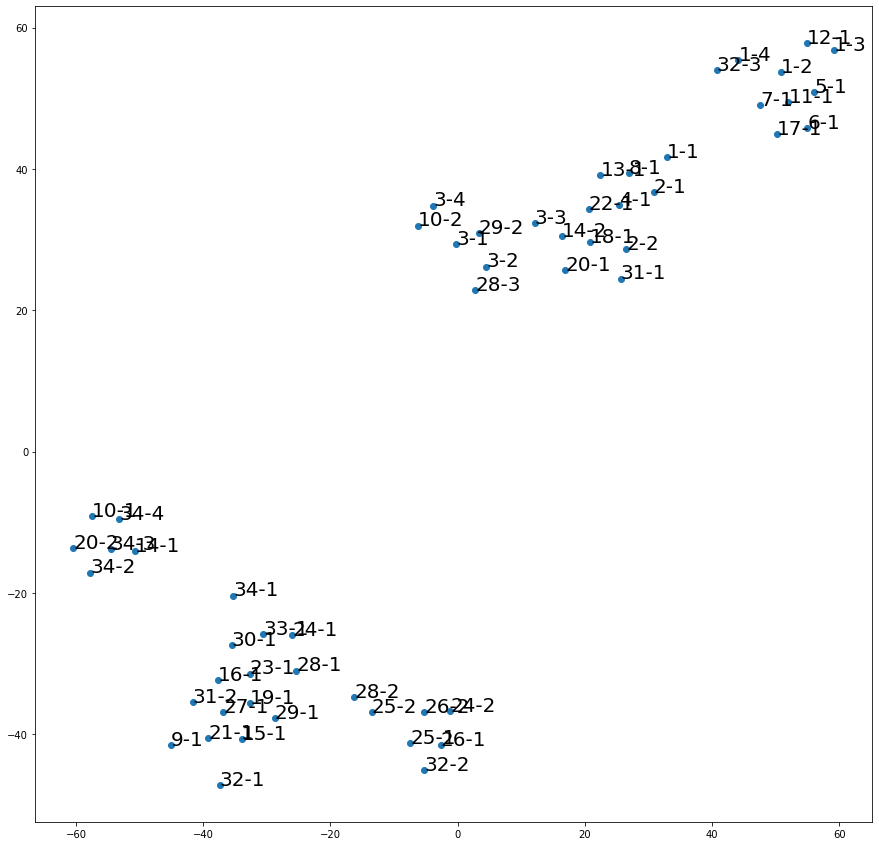

In [7]:
emb = model.embedding
base_embedding_list =  np.vstack([v for k,v in emb.items()])
persona_list = list(emb.keys())
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
Y = TSNE(n_components=2, learning_rate=100, perplexity=10).fit_transform(base_embedding_list)
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(Y[:,0], Y[:,1])
for i, name in enumerate(persona_list):
    plt.annotate(name, xy=Y[i], fontsize=20)
plt.show()